<a href="https://colab.research.google.com/github/mpaezmolina/obviouslabs/blob/master/Generator_TF_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import ol_utils as ut
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from typing import Counter

In [ ]:
X_train, X_test, y_train, y_test = ut.get_data("CatBoostClassifier_1m_table")

Before cleaninig: 2275203
After cleaninig: 2275203
Original dataset shape Counter({False: 1138399, True: 1136804})


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(33))
model.add(tf.keras.layers.Dense(33, activation="relu"))
model.add(tf.keras.layers.Dense(17, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy()])
#model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics="accuracy")

In [ ]:
y_train.shape

(1932566,)

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60393/60393 [==============================] - 25s 405us/step - loss: nan - binary_accuracy: 0.4999
Epoch 2/10
60393/60393 [==============================] - 26s 431us/step - loss: nan - binary_accuracy: 0.4999
Epoch 3/10
60393/60393 [==============================] - 26s 424us/step - loss: nan - binary_accuracy: 0.4999
Epoch 4/10
60393/60393 [==============================] - 23s 386us/step - loss: nan - binary_accuracy: 0.4999
Epoch 5/10
60393/60393 [==============================] - 26s 432us/step - loss: nan - binary_accuracy: 0.4999
Epoch 6/10
60393/60393 [==============================] - 25s 420us/step - loss: nan - binary_accuracy: 0.4999
Epoch 7/10
60393/60393 [==============================] - 25s 407us/step - loss: nan - binary_accuracy: 0.4999
Epoch 8/10
60393/60393 [==============================] - 25s 421us/step - loss: nan - binary_accuracy: 0.4999
Epoch 9/10
60393/60393 [==============================] - 24s 394us/step - loss: nan - binary_accuracy: 0.4999
E

In [ ]:
model.evaluate(X_test, y_test)

17795/17795 [==============================] - 6s 307us/step - loss: 0.7025 - binary_accuracy: 0.6922 - precision_1: 0.3574 - recall_1: 0.0181


[0.7025406956672668,
 0.6922158598899841,
 0.35741227865219116,
 0.01809973083436489]

In [ ]:
model.save('modelito')

INFO:tensorflow:Assets written to: modelito/assets


In [ ]:
X_test_tensors = tf.constant(X_test.squeeze())
y_test_tensors = tf.constant(y_test.squeeze())
x_test_tensor = X_test_tensors[10]
x_test_tensor = tf.reshape(x_test_tensor, (1,34))
y_test_tensor = y_test_tensors[10]
x_test_tensor, y_test_tensor

(<tf.Tensor: shape=(1, 34), dtype=float64, numpy=
 array([[ 3.04933800e+00,  3.06385000e+00,  3.14852435e+00,
          2.97003120e+00,  3.05927778e+00, -2.62406844e-02,
          7.37312002e-04, -2.55033724e-02,  2.34913750e+01,
         -1.77256209e+01, -5.55000000e+01,  4.93886976e+01,
         -6.10000000e-02, -2.85347868e+00,  3.08017947e+00,
         -1.00000000e+00,  2.99570986e+00,  2.99570986e+00,
          3.24661643e-02, -2.16509464e+01, -4.95192308e-02,
          3.25158238e+01, -4.75071683e-01,  3.00063883e+00,
          3.04933800e+00,  3.09803717e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          1.00000000e+00]])>,
 <tf.Tensor: shape=(), dtype=float16, numpy=0.0>)

In [ ]:
model.predict(x_test_tensor)

1/1 [==============================] - 0s 58ms/step


array([[0.11605632]], dtype=float32)

In [ ]:
y_pred = model.predict(X_test)

17795/17795 [==============================] - 4s 221us/step


In [ ]:
y_pred

NameError: ignored

In [ ]:
cf_matrix = confusion_matrix(y_test, tf.round(y_pred))
cf_matrix

array([[334914,  61746],
       [143248,  29517]])

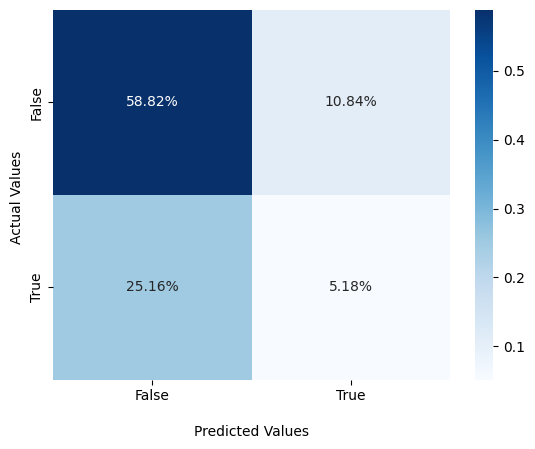

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_test, tf.round(y_pred))
cf_matrix

array([[391038,   5622],
       [169638,   3127]])